Name: Akshay Santoshi
<br>
Roll No: CS21BTECH11012

In [156]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split


<b>QUESTION 1(a)</b>

In [157]:
# Define transformations (convert to tensor & normalize)
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])


In [158]:
# Load MNIST dataset
mnist_data = datasets.MNIST(root="./data", train=True, transform=transform, download=True)


In [159]:

# Split into train (70%), validation (10%), and test (20%)
train_size = int(0.7 * len(mnist_data))
val_size = int(0.1 * len(mnist_data))
test_size = len(mnist_data) - train_size - val_size
train_data, val_data, test_data = random_split(mnist_data, [train_size, val_size, test_size])


In [160]:
# Create DataLoaders with different batch sizes
train_loader_ann = DataLoader(train_data, batch_size=64, shuffle=True)
val_loader_ann = DataLoader(val_data, batch_size=64, shuffle=False)
test_loader_ann = DataLoader(test_data, batch_size=64, shuffle=False)

train_loader_cnn = DataLoader(train_data, batch_size=128, shuffle=True)
val_loader_cnn = DataLoader(val_data, batch_size=128, shuffle=False)
test_loader_cnn = DataLoader(test_data, batch_size=128, shuffle=False)

train_loader_vit = DataLoader(train_data, batch_size=256, shuffle=True)
val_loader_vit = DataLoader(val_data, batch_size=256, shuffle=False)
test_loader_vit = DataLoader(test_data, batch_size=256, shuffle=False)

In [161]:
import torch.nn as nn
import torch.optim as optim

class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(28*28, 1024)
        self.fc2 = nn.Linear(1024, 1024)
        self.fc3 = nn.Linear(1024, 10)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x


In [162]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 14 * 14, 128)
        self.fc2 = nn.Linear(128, 10)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(-1, 64 * 14 * 14)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x


In [163]:
from torchvision.models.vision_transformer import VisionTransformer

# Predefined ViT model (16x16 patches, 6 transformer layers, 8 attention heads)
vit_model = VisionTransformer(
    image_size=28,  # MNIST image size
    patch_size=7,  # 4x4 patches
    num_layers=6,  # Number of transformer layers
    num_heads=8,  # Attention heads
    hidden_dim=64,  # Embedding dimension
    mlp_dim=128,  # Feedforward layer size
    num_classes=10,  # Output classes
)


Training for ANN Model:
Epoch 1/10 - Train Loss: 0.3158 - Val Loss: 0.1817
Epoch 2/10 - Train Loss: 0.1567 - Val Loss: 0.1580
Epoch 3/10 - Train Loss: 0.1195 - Val Loss: 0.1506
Epoch 4/10 - Train Loss: 0.0935 - Val Loss: 0.1133
Epoch 5/10 - Train Loss: 0.0799 - Val Loss: 0.1156
Epoch 6/10 - Train Loss: 0.0690 - Val Loss: 0.0974
Epoch 7/10 - Train Loss: 0.0609 - Val Loss: 0.1388
Epoch 8/10 - Train Loss: 0.0536 - Val Loss: 0.1173
Epoch 9/10 - Train Loss: 0.0467 - Val Loss: 0.1127
Epoch 10/10 - Train Loss: 0.0459 - Val Loss: 0.0964


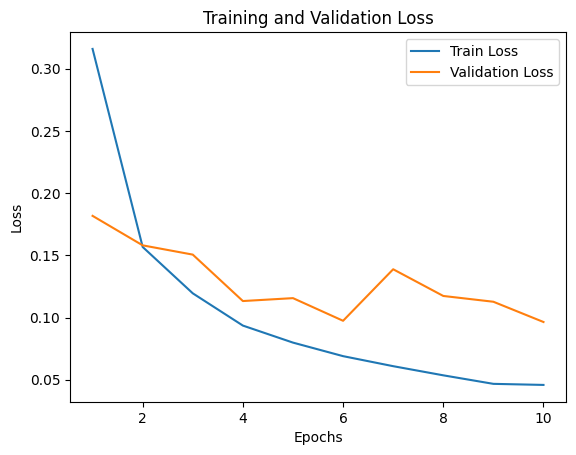

Training for CNN Model:
Epoch 1/10 - Train Loss: 0.1938 - Val Loss: 0.0684
Epoch 2/10 - Train Loss: 0.0471 - Val Loss: 0.0568
Epoch 3/10 - Train Loss: 0.0285 - Val Loss: 0.0437
Epoch 4/10 - Train Loss: 0.0188 - Val Loss: 0.0395
Epoch 5/10 - Train Loss: 0.0135 - Val Loss: 0.0463
Epoch 6/10 - Train Loss: 0.0114 - Val Loss: 0.0471
Epoch 7/10 - Train Loss: 0.0082 - Val Loss: 0.0544
Epoch 8/10 - Train Loss: 0.0061 - Val Loss: 0.0517
Epoch 9/10 - Train Loss: 0.0075 - Val Loss: 0.0657
Epoch 10/10 - Train Loss: 0.0084 - Val Loss: 0.0632


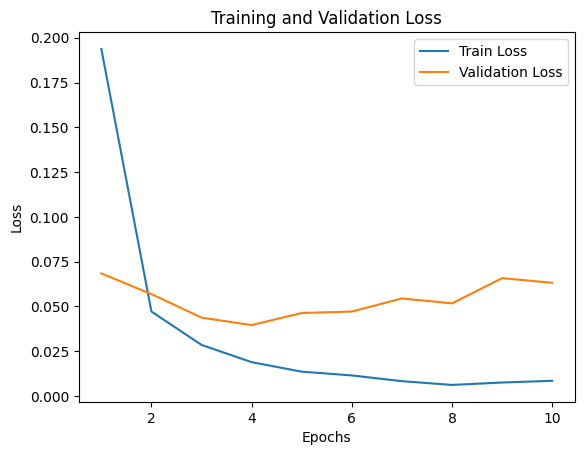

Training for ViT Model:
Epoch 1/15 - Train Loss: 1.1534 - Val Loss: 0.7507
Epoch 2/15 - Train Loss: 0.3195 - Val Loss: 0.2391
Epoch 3/15 - Train Loss: 0.1759 - Val Loss: 0.2130
Epoch 4/15 - Train Loss: 0.1275 - Val Loss: 0.1589
Epoch 5/15 - Train Loss: 0.0842 - Val Loss: 0.1436
Epoch 6/15 - Train Loss: 0.0710 - Val Loss: 0.1269
Epoch 7/15 - Train Loss: 0.0558 - Val Loss: 0.1376
Epoch 8/15 - Train Loss: 0.0447 - Val Loss: 0.1267
Epoch 9/15 - Train Loss: 0.0383 - Val Loss: 0.1440
Epoch 10/15 - Train Loss: 0.0336 - Val Loss: 0.1126
Epoch 11/15 - Train Loss: 0.0362 - Val Loss: 0.1237
Epoch 12/15 - Train Loss: 0.0300 - Val Loss: 0.1303
Epoch 13/15 - Train Loss: 0.0277 - Val Loss: 0.1660
Epoch 14/15 - Train Loss: 0.0611 - Val Loss: 0.1054
Epoch 15/15 - Train Loss: 0.0166 - Val Loss: 0.1222


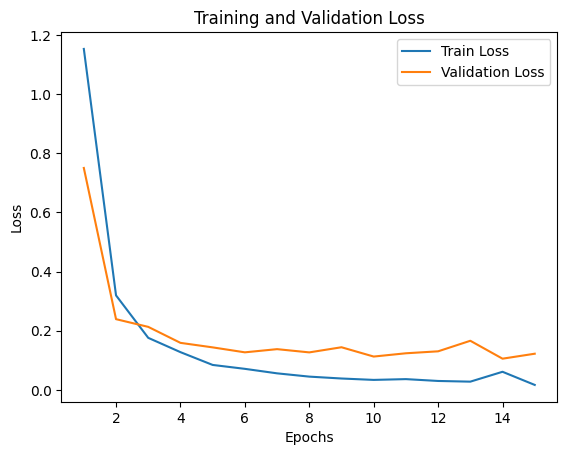

In [164]:
import torch
import matplotlib.pyplot as plt

def train_model(model, train_loader, val_loader, epochs=10, lr=0.001):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    optimizer = optim.Adam(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()
    
    train_losses, val_losses = [], []
    
    for epoch in range(epochs):
        model.train()
        train_loss = 0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            if isinstance(model, ANN):
                # images = images.view(images.size(0), -1)  # Flatten for ANN
                images = images.mean(dim=1, keepdim=True)
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        
        train_losses.append(train_loss / len(train_loader))
        
        # Validation Loss
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                if isinstance(model, ANN):
                    # images = images.view(images.size(0), -1)# Flatten for ANN
                    images = images.mean(dim=1, keepdim=True)
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
        
        val_losses.append(val_loss / len(val_loader))
        
        print(f"Epoch {epoch+1}/{epochs} - Train Loss: {train_losses[-1]:.4f} - Val Loss: {val_losses[-1]:.4f}")
    
    # Plot Loss Curves
    plt.plot(range(1, epochs+1), train_losses, label="Train Loss")
    plt.plot(range(1, epochs+1), val_losses, label="Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.title("Training and Validation Loss")
    plt.show()

# Train ANN
ann_model = ANN()
print("Training for ANN Model:")
train_model(ann_model, train_loader_ann, val_loader_ann, epochs=10, lr=0.001)

# Train CNN
cnn_model = CNN()
print("Training for CNN Model:")
train_model(cnn_model, train_loader_cnn, val_loader_cnn, epochs=10, lr=0.001)

# Train ViT
print("Training for ViT Model:")
train_model(vit_model, train_loader_vit, val_loader_vit, epochs=15, lr=0.001)

In [165]:
def test_model(model, test_loader):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    model.eval()
    
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            if isinstance(model, ANN):
                # images = images.view(images.size(0), -1)  # Flatten for ANN
                images = images.mean(dim=1, keepdim=True)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)
    
    accuracy = correct / total * 100
    print(f"Test Accuracy: {accuracy:.2f}%")

# Test ANN
print("For ANN:")
test_model(ann_model, test_loader_ann)

# Test CNN
print("For CNN:")
test_model(cnn_model, test_loader_cnn)

# Test ViT
print("For ViT:")
test_model(vit_model, test_loader_vit)


For ANN:
Test Accuracy: 97.38%
For CNN:
Test Accuracy: 98.69%
For ViT:
Test Accuracy: 97.20%


Choice of optimizer: Adam
<br>
It adapts the learning rate for each parameter, leading to faster convergence. It combines the benefits of momentum and adaptive learning rates. Works well without requiring extensive hyperparameter tuning, also, it is less sensitive to poor initialization.

Choice of hyperparameters:
<br>
| Model | Learning Rate | Batch Size | Number of epochs |
| :- | -: | :-: | :-: |
| ANN | 0.01 | 64 | 10 |
| CNN | 0.01 | 128 | 10 |
| ViT | 0.01 | 256 | 15 |

<br>
The batchsizes shown in the table help in better generalization and stable training. The number of epochs is more for ViT compared 
to ANN and CNN because transformers take longer to converge. The learning rates given help in better learning.


<b>QUESTION 1(b)</b>

In [166]:
# Different architectures for ANN

class ANN1(nn.Module):  # Small ANN
    def __init__(self):
        super(ANN1, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 10)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

class ANN2(nn.Module):  # Larger ANN
    def __init__(self):
        super(ANN2, self).__init__()
        self.fc1 = nn.Linear(28*28, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)
    
    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.relu(self.fc1(x))
        x = self.dropout(self.relu(self.fc2(x)))
        x = self.fc3(x)
        return x


In [167]:
# Different architectures for CNN

class CNN1(nn.Module):  # Small CNN
    def __init__(self):
        super(CNN1, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(2, 2)
    
    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

class CNN2(nn.Module):  # Deeper CNN
    def __init__(self):
        super(CNN2, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(128 * 3 * 3, 256)
        self.fc2 = nn.Linear(256, 10)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.3)
    
    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = self.pool(self.relu(self.conv3(x)))
        x = x.view(x.size(0), -1)
        x = self.dropout(self.relu(self.fc1(x)))
        x = self.fc2(x)
        return x


In [168]:
# Different architectures for ViT

vit_model1 = VisionTransformer(
    image_size=28,
    patch_size=7,
    num_layers=6,       # Experiment with 6 or 12
    num_heads=8,        # Experiment with 4 or 8
    hidden_dim=128,     # Try 128 or 256
    mlp_dim=256,
    num_classes=10
)

vit_model2 = VisionTransformer(
    image_size=28,
    patch_size=7,
    num_layers=12,       # Experiment with 6 or 12
    num_heads=8,        # Experiment with 4 or 8
    hidden_dim=128,     # Try 128 or 256
    mlp_dim=256,
    num_classes=10
)


In [169]:
import torch
import matplotlib.pyplot as plt

def train_model1(model, train_loader, val_loader, epochs=10, lr=0.001):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    optimizer = optim.Adam(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()
    
    train_losses, val_losses = [], []
    
    for epoch in range(epochs):
        model.train()
        train_loss = 0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            if (isinstance(model, ANN1) or isinstance(model, ANN2)):
                images = images.mean(dim=1, keepdim=True)
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        if (epoch==9):
            train_loss = (train_loss / len(train_loader))
            print(f"Epoch {epoch+1}/{epochs} - Train Loss: {train_loss:.4f}")
           
    return model    
        
        # print(f"Epoch {epoch+1}/{epochs} - Train Loss: {train_losses[-1]:.4f} - Val Loss: {val_losses[-1]:.4f}")


In [170]:
def test_model1(model, test_loader):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    model.eval()
    
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            if (isinstance(model, ANN1) or isinstance(model, ANN2)):
                # images = images.view(images.size(0), -1)  # Flatten for ANN
                images = images.mean(dim=1, keepdim=True)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)
    
    accuracy = correct / total * 100
    print(f"Test Accuracy: {accuracy:.2f}%")

In [171]:
# Create DataLoaders
batch_size = 64
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

In [174]:
models = {
    "ANN1": ANN1(),
    "ANN2": ANN2(),
    "CNN1": CNN1(),
    "CNN2": CNN2(),
    "ViT1": vit_model1,
    "ViT2": vit_model2
}

trained_models = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    trained_models[name] = train_model1(model, train_loader, val_loader)


Training ANN1...
Epoch 10/10 - Train Loss: 0.0632

Training ANN2...
Epoch 10/10 - Train Loss: 0.0639

Training CNN1...
Epoch 10/10 - Train Loss: 0.0065

Training CNN2...
Epoch 10/10 - Train Loss: 0.0143

Training ViT1...
Epoch 10/10 - Train Loss: 0.0608

Training ViT2...
Epoch 10/10 - Train Loss: 0.0759


In [175]:
for name, model in trained_models.items():
    print(f"\nTesting {name}...")
    test_model1(model, test_loader)


Testing ANN1...
Test Accuracy: 96.30%

Testing ANN2...
Test Accuracy: 97.13%

Testing CNN1...
Test Accuracy: 98.92%

Testing CNN2...
Test Accuracy: 99.00%

Testing ViT1...
Test Accuracy: 97.57%

Testing ViT2...
Test Accuracy: 97.28%


In [176]:

for name, model in trained_models.items():
    if name=='ANN1':
        print("\nModel: ANN0")
        total_params = sum(p.numel() for p in ann_model.parameters())
        print(f'Total number of parameters: {total_params}')

        print(f"\nModel: {name}")
        total_params = sum(p.numel() for p in model.parameters())
        print(f'Total number of parameters: {total_params}')
        
    elif name=='CNN1':
        print("\nModel: CNN0")
        total_params = sum(p.numel() for p in cnn_model.parameters())
        print(f'Total number of parameters: {total_params}')

        print(f"\nModel: {name}")
        total_params = sum(p.numel() for p in model.parameters())
        print(f'Total number of parameters: {total_params}')
        
    elif name=='ViT1':
        print("\nModel: ViT0")
        total_params = sum(p.numel() for p in vit_model.parameters())
        print(f'Total number of parameters: {total_params}')

        print(f"\nModel: {name}")
        total_params = sum(p.numel() for p in model.parameters())
        print(f'Total number of parameters: {total_params}')
    else:   
        print(f"\nModel: {name}")
        total_params = sum(p.numel() for p in model.parameters())
        print(f'Total number of parameters: {total_params}')
    

        


Model: ANN0
Total number of parameters: 1863690

Model: ANN1
Total number of parameters: 101770

Model: ANN2
Total number of parameters: 235146

Model: CNN0
Total number of parameters: 1626442

Model: CNN1
Total number of parameters: 422218

Model: CNN2
Total number of parameters: 390986

Model: ViT0
Total number of parameters: 212234

Model: ViT1
Total number of parameters: 817674

Model: ViT2
Total number of parameters: 1612554


| Model | Accuracy |  Parameter Size |
| :- |  :-: | :-: |
| ANN0 | 97.38% | 1863690 |
| ANN1 | 96.30% | 101770 |
| ANN2 | 97.13% | 235146 |
| CNN0 | 98.69% | 1626442 |
| CNN1 | 98.92% | 422218 |
| CNN2 | 99.00% | 390986 |
| ViT0 | 97.20% | 212234 |
| ViT1 | 97.57% | 817674 | 
| ViT2 | 97.28% | 1612554 | 

Models which are good tradeoff between accuracy and parameter size would be:
<br>
ANN2, CNN2 and ViT1

<b>QUESTION 1(c)</b>

In [178]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import numpy as np

def extract_features(model, test_loader, feature_layer):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    model.eval()
    features = []
    labels = []
    with torch.no_grad():
        for images, targets in test_loader:
            images = images.to(device)
            if (isinstance(model, ANN1) or isinstance(model, ANN2)):
                # images = images.view(images.size(0), -1)  # Flatten for ANN
                images = images.mean(dim=1, keepdim=True)
            output = model(images)
            if feature_layer == "logits":  # ANN case
                feature_vec = output.cpu().numpy()
            elif feature_layer == "bottleneck":  # CNN case
                feature_vec = output.cpu().numpy()
            elif feature_layer == "cls_token":  # ViT case
                feature_vec = output.cpu().numpy()
            features.append(feature_vec)
            labels.append(targets.numpy())
    return np.concatenate(features), np.concatenate(labels)

def plot_tsne(features, labels, title):
    tsne = TSNE(n_components=2, random_state=42)
    reduced_features = tsne.fit_transform(features)
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=reduced_features[:, 0], y=reduced_features[:, 1], hue=labels, palette="tab10", alpha=0.7)
    plt.title(title)
    plt.legend(title="Digits")
    plt.show()


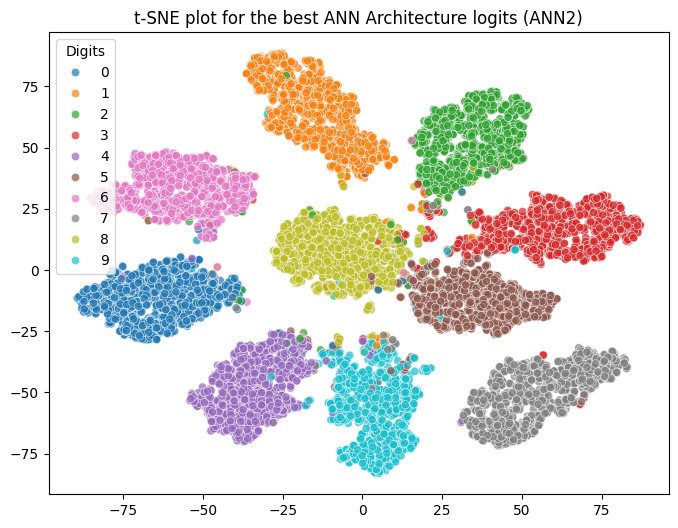

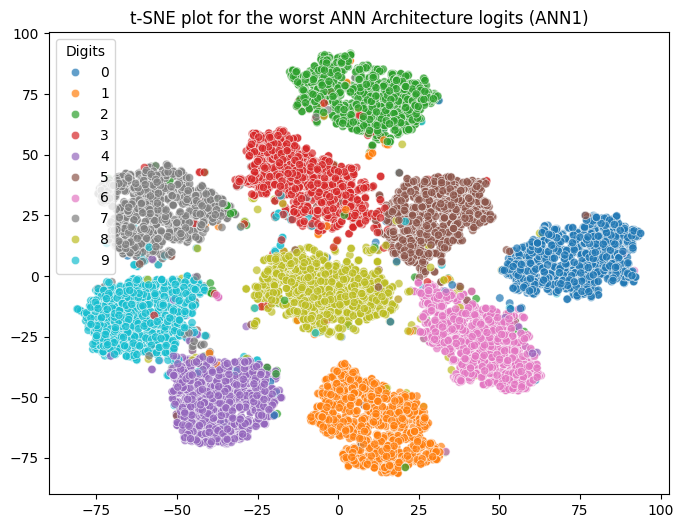

In [179]:
# Extract and plot t-SNE for ANN
ann_model_best = trained_models["ANN2"]  # Load ANN model
ann_model_worst = trained_models["ANN1"]

ann_features_best, ann_labels_best = extract_features(ann_model_best, test_loader, "logits")
plot_tsne(ann_features_best, ann_labels_best, "t-SNE plot for the best ANN Architecture logits (ANN2)")

ann_features_worst, ann_labels_worst = extract_features(ann_model_worst, test_loader, "logits")
plot_tsne(ann_features_worst, ann_labels_worst, "t-SNE plot for the worst ANN Architecture logits (ANN1)")



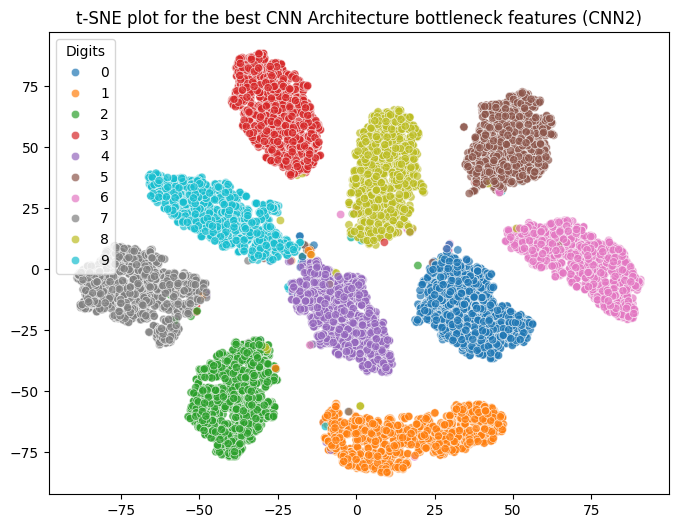

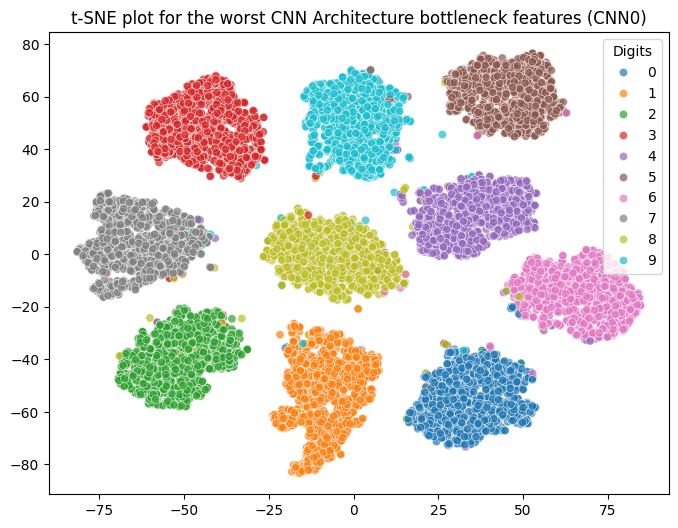

In [180]:
# Extract and plot t-SNE for CNN
cnn_model_best = trained_models["CNN2"]  # Load CNN model
cnn_model_worst = cnn_model

cnn_features_best, cnn_labels_best = extract_features(cnn_model_best, test_loader, "bottleneck")
plot_tsne(cnn_features_best, cnn_labels_best, "t-SNE plot for the best CNN Architecture bottleneck features (CNN2)")

cnn_features_worst, cnn_labels_worst = extract_features(cnn_model_worst, test_loader_cnn, "bottleneck")
plot_tsne(cnn_features_worst, cnn_labels_worst, "t-SNE plot for the worst CNN Architecture bottleneck features (CNN0)")

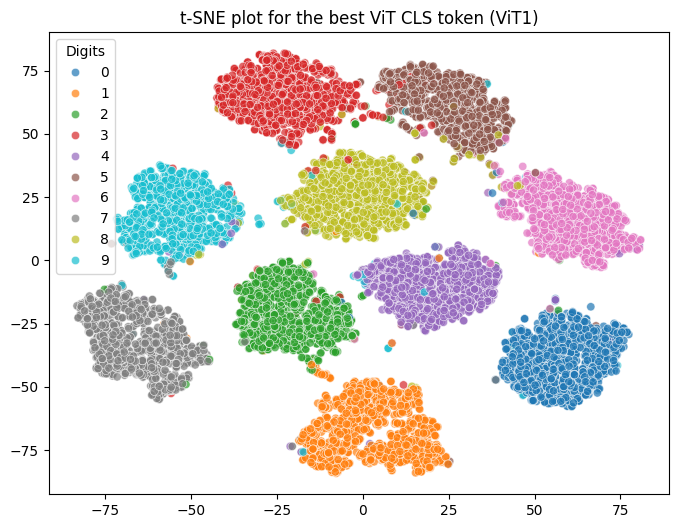

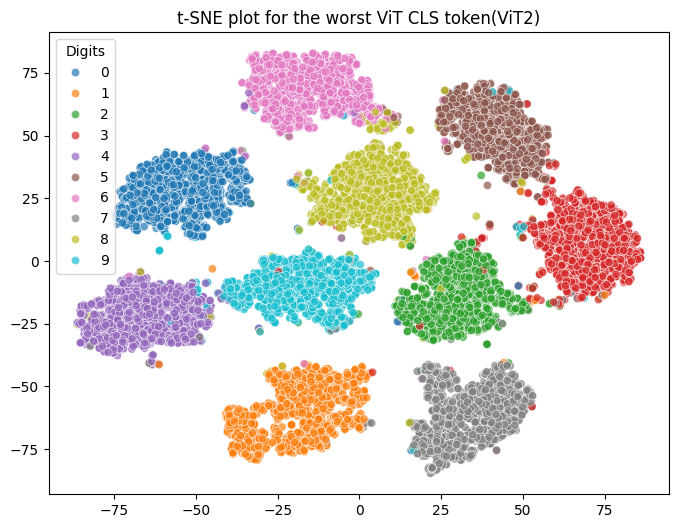

In [181]:
# Extract and plot t-SNE for ViT
vit_model_best = trained_models["ViT1"]  # Load ViT model
vit_model_worst = trained_models["ViT2"]

vit_features_best, vit_labels_best = extract_features(vit_model_best, test_loader, "cls_token")
plot_tsne(vit_features_best, vit_labels_best, "t-SNE plot for the best ViT CLS token (ViT1)")

vit_features_worst, vit_labels_worst = extract_features(vit_model_worst, test_loader, "cls_token")
plot_tsne(vit_features_worst, vit_labels_worst, "t-SNE plot for the worst ViT CLS token(ViT2)")

<b>QUESTION 1(d)</b>

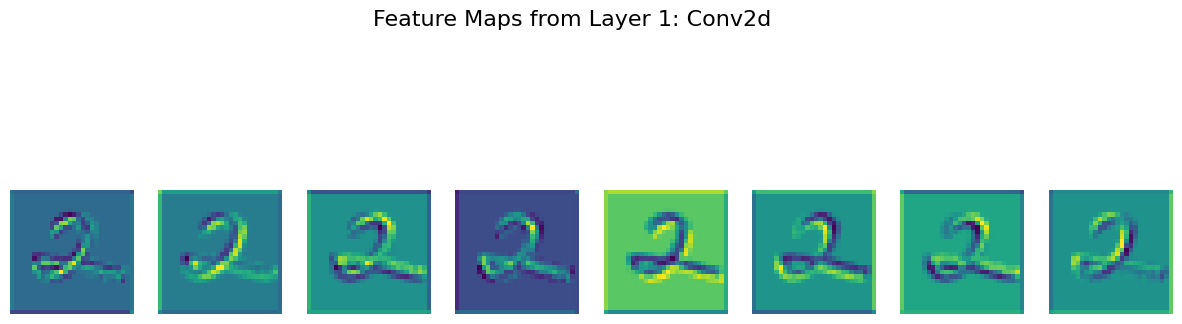

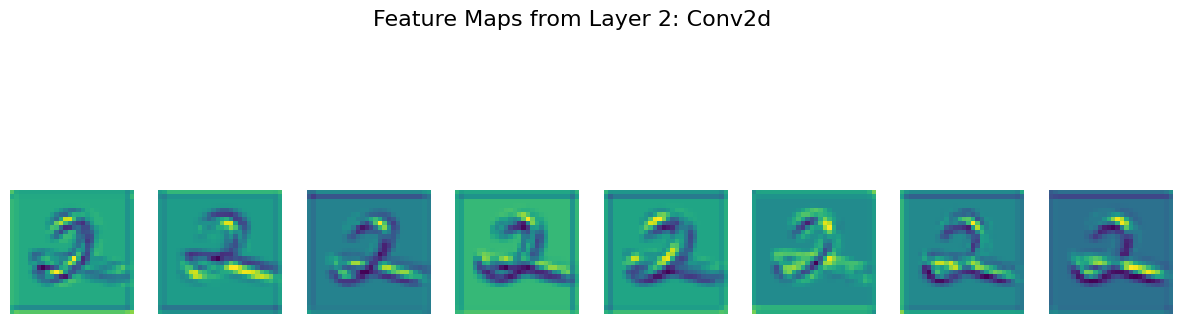

In [188]:
# To get the feature map for CNN

# Define a hook to extract feature maps
def get_feature_maps(model, layer, image):
    activation = {}

    def hook_fn(module, input, output):
        activation['feature_map'] = output

    hook = layer.register_forward_hook(hook_fn)
    _ = model(image.unsqueeze(0))  # Forward pass
    hook.remove()
    
    return activation['feature_map'].detach().cpu()

# Example: Visualizing feature maps from CNN
def plot_feature_maps(model, image, layers):
    for i, layer in enumerate(layers):
        feature_maps = get_feature_maps(model, layer, image)
        num_maps = feature_maps.shape[1]
        
        fig, axes = plt.subplots(1, min(num_maps, 8), figsize=(15, 5))
        fig.suptitle(f"Feature Maps from Layer {i + 1}: {layer.__class__.__name__}", fontsize=16)
        for j in range(min(num_maps, 8)):  
            axes[j].imshow(feature_maps[0, j])
            axes[j].axis("off")
        plt.show()

# Get CNN layers (adjust based on your model)
# Get a single batch from test_loader_cnn
data_iter_cnn = iter(test_loader_cnn)
images_sample, labels_sample = next(data_iter_cnn)

# Select one image (first image in batch)
sample_image = images_sample[0]
cnn_layers = [cnn_model.conv1, cnn_model.conv2]  
plot_feature_maps(cnn_model, sample_image, cnn_layers)

Learning process across the first convolution layer:
<br>
The model is learning low-level features like edges, lines, and textures. These are universal features common to all images and not yet specific to digits.
<br>
<br>
Learning process across the second convolution layer:
<br>
The model is learning higher-level features by combining simple edges into more complex patterns (e.g., curves, parts of digits). It starts recognizing digit-specific structures, like the outline of "2", or other digit shapes.

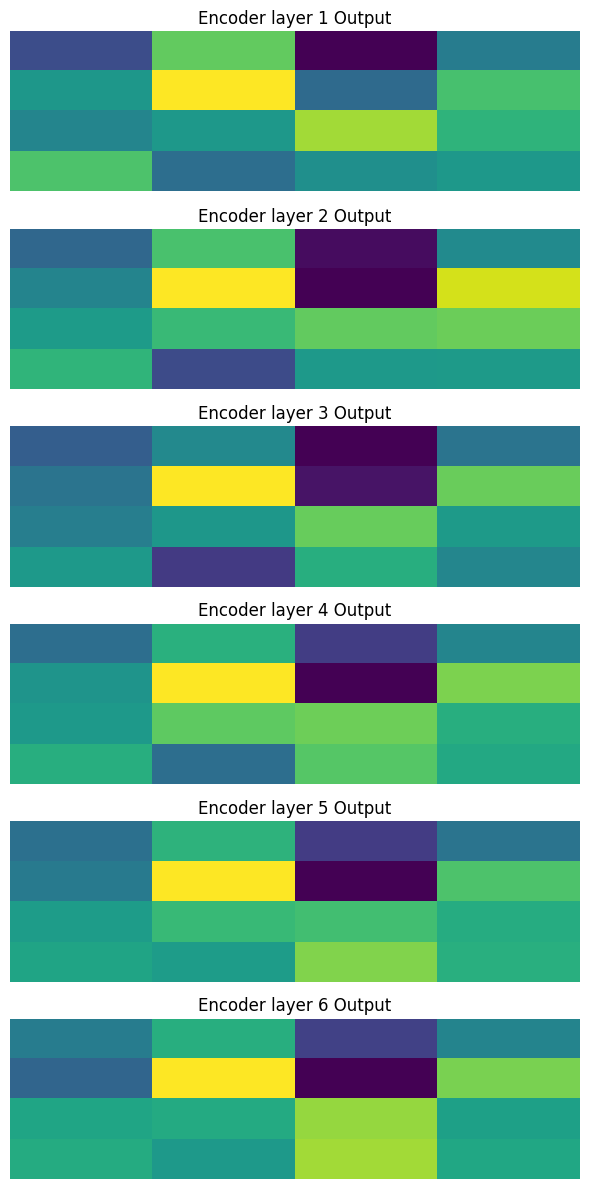

In [217]:
# Extracting encoder layer outputs of ViT

def get_encoder_outputs(model, image):
    with torch.no_grad():
        outputs = model(image.unsqueeze(0), output_hidden_states=True)
    return outputs.hidden_states  # Hidden states at each encoder layer

# Example: Visualizing encoder layer outputs
def plot_encoder_outputs(model, image, layers):
    encoder_outputs = get_encoder_outputs(model, image)
    
    for i, layer_idx in enumerate(layers):
        layer_output = encoder_outputs[layer_idx][0]  
        seq_len, hidden_dim = layer_output.shape
        fig, axes = plt.subplots(num_layers, 1, figsize=(6, 2*layers.size))
        
        for i, layer in enumerate(self.encoder_layers):
            x = layer(x)
            
            intermediate_cls.append(x[:, 0, :].detach().cpu().numpy())
            if return_intermediate:
                
                layer_output = x[:, 1:, :]  
                
                height = width = int(np.sqrt(layer_output.size(1)))
                layer_output = layer_output.view(x.size(0), height, width, -1)
                # Average the embeddings across the channels (emb_dim)
                layer_output = layer_output.mean(dim=-1).detach().cpu().numpy()
                axes[i].imshow(layer_output[0], cmap="viridis", aspect="auto")
                axes[i].set_title(f'Encoder layer {i+1} Output')
                axes[i].set_yticks([])
                axes[i].axis("off")
        
        plt.show()

plot_encoder_outputs(vit_model, sample_image, encoder_layers)


Analysis of encoder outputs:
<br>
Early layers focus on local patterns, mid layers refine the digit representation, and deep layers learn to understand the entire digit as a whole.

<b>QUESTION 1(e)</b>

The poor performance of ViT compared to other models is because there isn’t enough overlap between patches (16 * 16 and 14 * 14), which means the model misses important spatial information needed to recognize the digits effectively. In contrast, CNNs handle local patterns more effectively by directly processing pixel neighborhoods and maintaining spatial relationships, leading to better performance on smaller images like MNIST.